<a href="https://colab.research.google.com/github/fmuranda/Climate_Science-/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial7.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial7.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 7: Other Computational Tools in Xarray

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

## ![project pythia](https://projectpythia.org/_static/images/logos/pythia_logo-blue-rtext.svg)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851

## ![CMIP.png](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/Art/CMIP.png?raw=true)


# Tutorial Objectives

*Estimated timing of tutorial:* 15 minutes

Thus far, we've learned about various climate processes in the videos, and we've explored tools in Xarray that are useful for analyzing and interpreting climate data in the tutorials.

In this tutorial, you'll continue using the SST data from CESM2 and practice using some additional computational tools in Xarray to resample your data, which can help with data comparison and analysis. The functions you will use are:

- `.resample()`: Groupby-like functionality specifically for time dimensions. Can be used for temporal upsampling and downsampling. Additional information about resampling in Xarray can be found [here](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations).
- `.rolling()`: Useful for computing aggregations on moving windows of your dataset e.g. computing moving averages. Additional information about resampling in Xarray can be found [here](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations).
- `.coarsen()`: Generic functionality for downsampling data. Additional information about resampling in Xarray can be found [here](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays).

# Setup


In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )
!pip install pythia_datasets cftime nc-time-axis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.1 MB/s eta 0:00:00


In [2]:
# imports
import matplotlib.pyplot as plt
import xarray as xr
from pythia_datasets import DATASETS

In [3]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D1_T7"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


In [4]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [5]:
# @title Video 1: Carbon Cycle and the Greenhouse Effect

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'y55CNZbTqw8'), ('Bilibili', 'BV1uV411T7RK')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Carbon_Cycle_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "sb3n5"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/sb3n5/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Carbon_Cycle_Slides")

# Section 1: High-level Computation Functionality

In this tutorial, you will learn about several methods for dealing with the resolution of data. Here are some links for quick reference, and we will go into detail in each of them in the sections below.

- `.resample()`: [Groupby-like functionality especially for time dimensions. Can be used for temporal upsampling and downsampling](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations)
- `.rolling()`: [Useful for computing aggregations on moving windows of your dataset e.g. computing moving averages](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations)
- `.coarsen()`: [Generic functionality for downsampling data](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays)

First, let's load the same data that we used in the previous tutorials (monthly SST data from CESM2):

In [9]:
filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
ds

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:204: SerializationWarning: variable 'tos' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 47MB
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 3kB ...
    lat_bnds   (lat, d2) float64 3kB ...
    lon_bnds   (lon, d2) float64 6kB ...
    tos        (time, lat, lon) float32 47MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

## Section 1.1: Resampling Data

For upsampling or downsampling temporal resolutions, we can use the `.resample()` method in Xarray.  For example, you can use this function to downsample a dataset from hourly to 6-hourly resolution.

Our original SST data is monthly resolution. Let's use `.resample()` to downsample to annual frequency:

In [10]:
# resample from a monthly to an annual frequency
tos_yearly = ds.tos.resample(time="AS")
tos_yearly

<string>:7: FutureWarning: 'AS' is deprecated and will be removed in a future version. Please use 'YS' instead of 'AS'.


<DataArrayResample, grouped over 1 grouper(s), 15 groups in total:
    '__resample_dim__': 15/15 groups present with labels 2000-01-01, 00:00:00, ..., 201...>

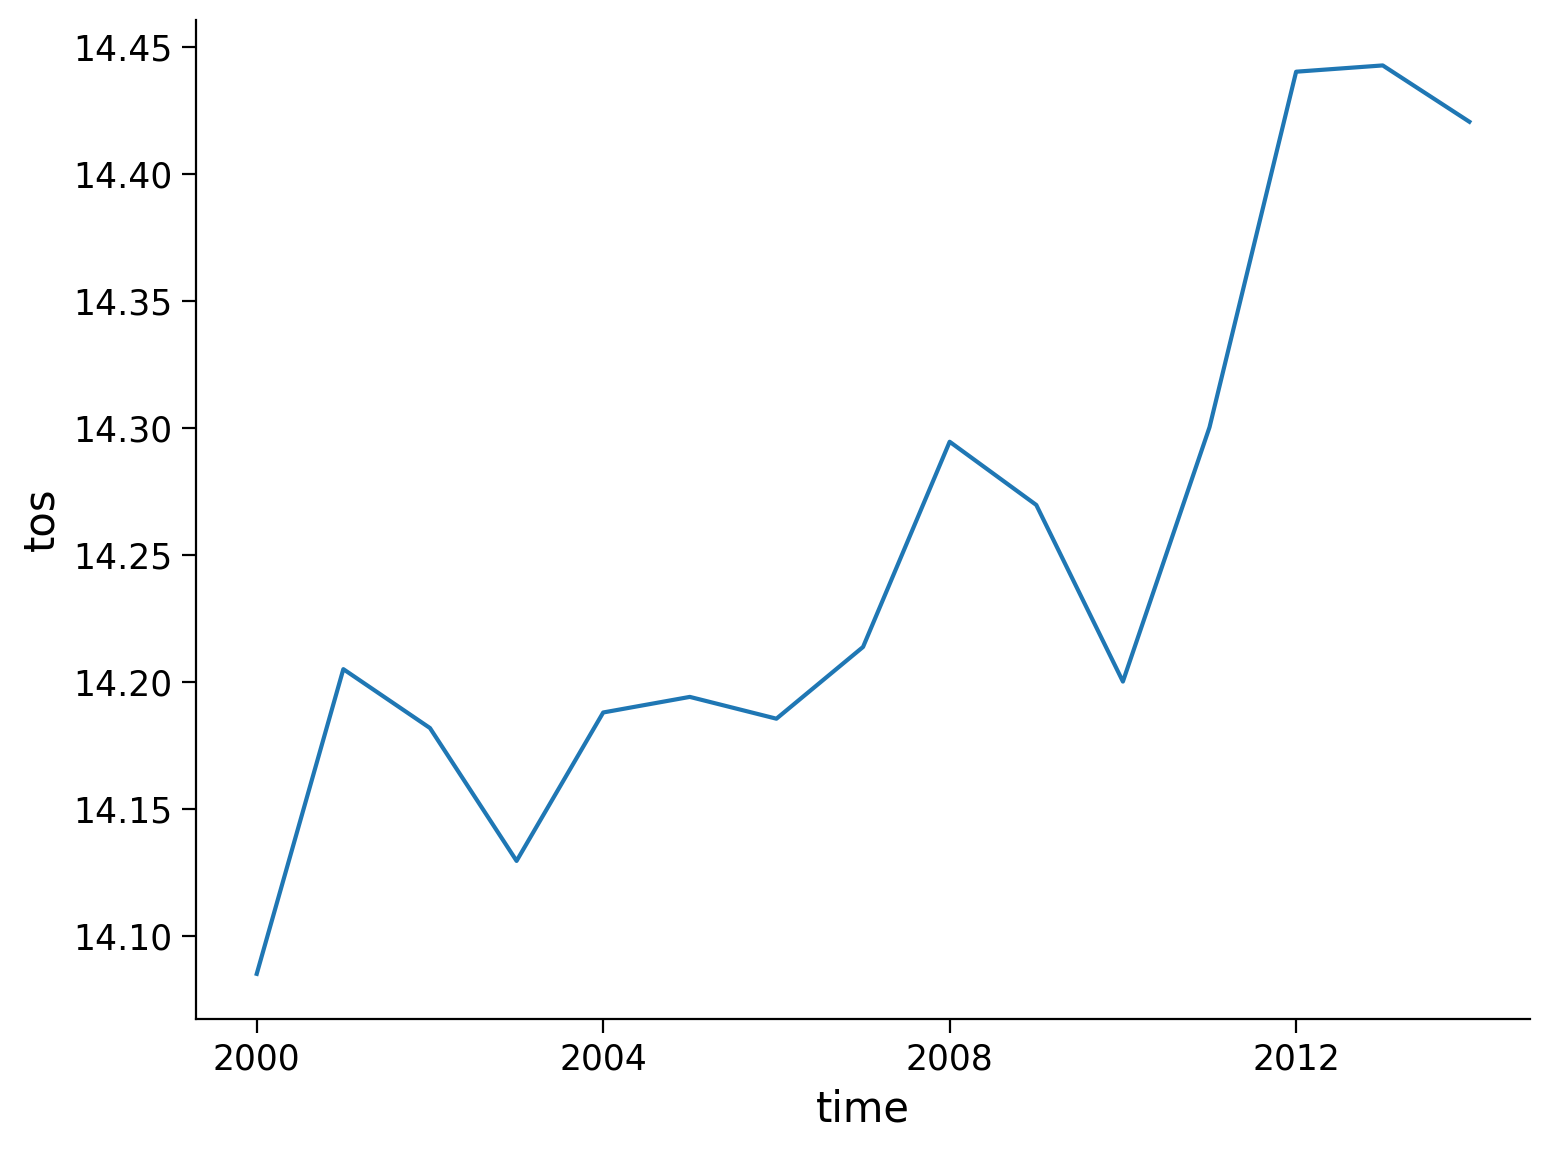

In [11]:
# calculate the global mean of the resampled data
annual_mean = tos_yearly.mean()
annual_mean_global = annual_mean.mean(dim=["lat", "lon"])
annual_mean_global.plot()


## Section 1.2: Moving Average

The `.rolling()` method allows for a rolling window aggregation and is applied along one dimension using the name of the dimension as a key (e.g. `time`) and the window size as the value (e.g. `6`). We will use these values in the demonstration below.

Let's use the `.rolling()` function to compute a 6-month moving average of our SST data:

In [12]:
# calculate the running mean
tos_m_avg = ds.tos.rolling(time=6, center=True).mean()
tos_m_avg

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

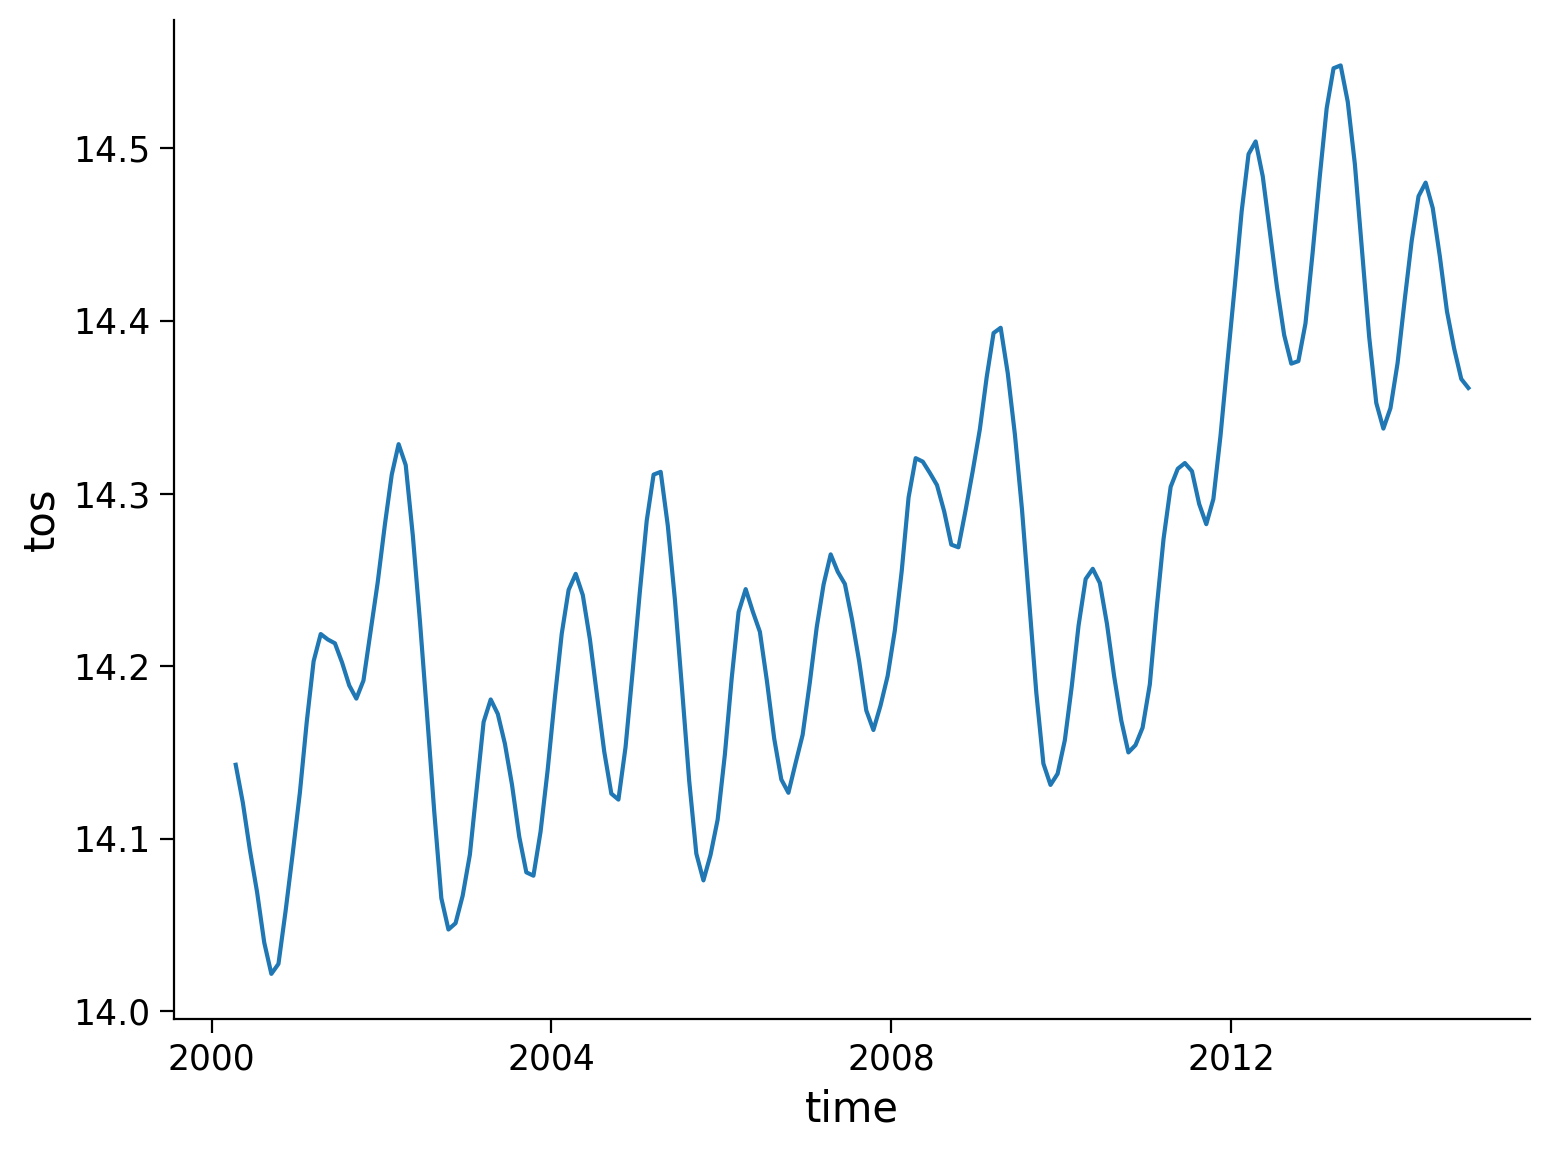

In [13]:
# calculate the global average of the running mean
tos_m_avg_global = tos_m_avg.mean(dim=["lat", "lon"])
tos_m_avg_global.plot()


## Section 1.3: Coarsening the Data

The `.coarsen()` function allows for block aggregation along multiple dimensions.

Let's use the `.coarsen()` function to take a block mean for every 4 months and globally (i.e., 180 points along the latitude dimension and 360 points along the longitude dimension). Although we know the dimensions of our data quite well, we will include code that finds the length of the latitude and longitude variables so that it could work for other datasets that have a different format.

In [14]:
# coarsen the data
coarse_data = ds.coarsen(time=4, lat=len(ds.lat), lon=len(ds.lon)).mean()
coarse_data

<xarray.Dataset> Size: 1kB
Dimensions:    (time: 45, d2: 2, lat: 1, lon: 1)
Coordinates:
  * time       (time) object 360B 2000-03-01 00:00:00 ... 2014-10-30 18:00:00
  * lat        (lat) float64 8B 0.0
  * lon        (lon) float64 8B 180.0
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 720B 2000-02-15 00:00:00 ... 2014-11-16 00:0...
    lat_bnds   (lat, d2) float64 16B -0.5 0.5
    lon_bnds   (lon, d2) float64 16B 179.5 180.5
    tos        (time, lat, lon) float32 180B 14.21 14.06 13.99 ... 14.41 14.3
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

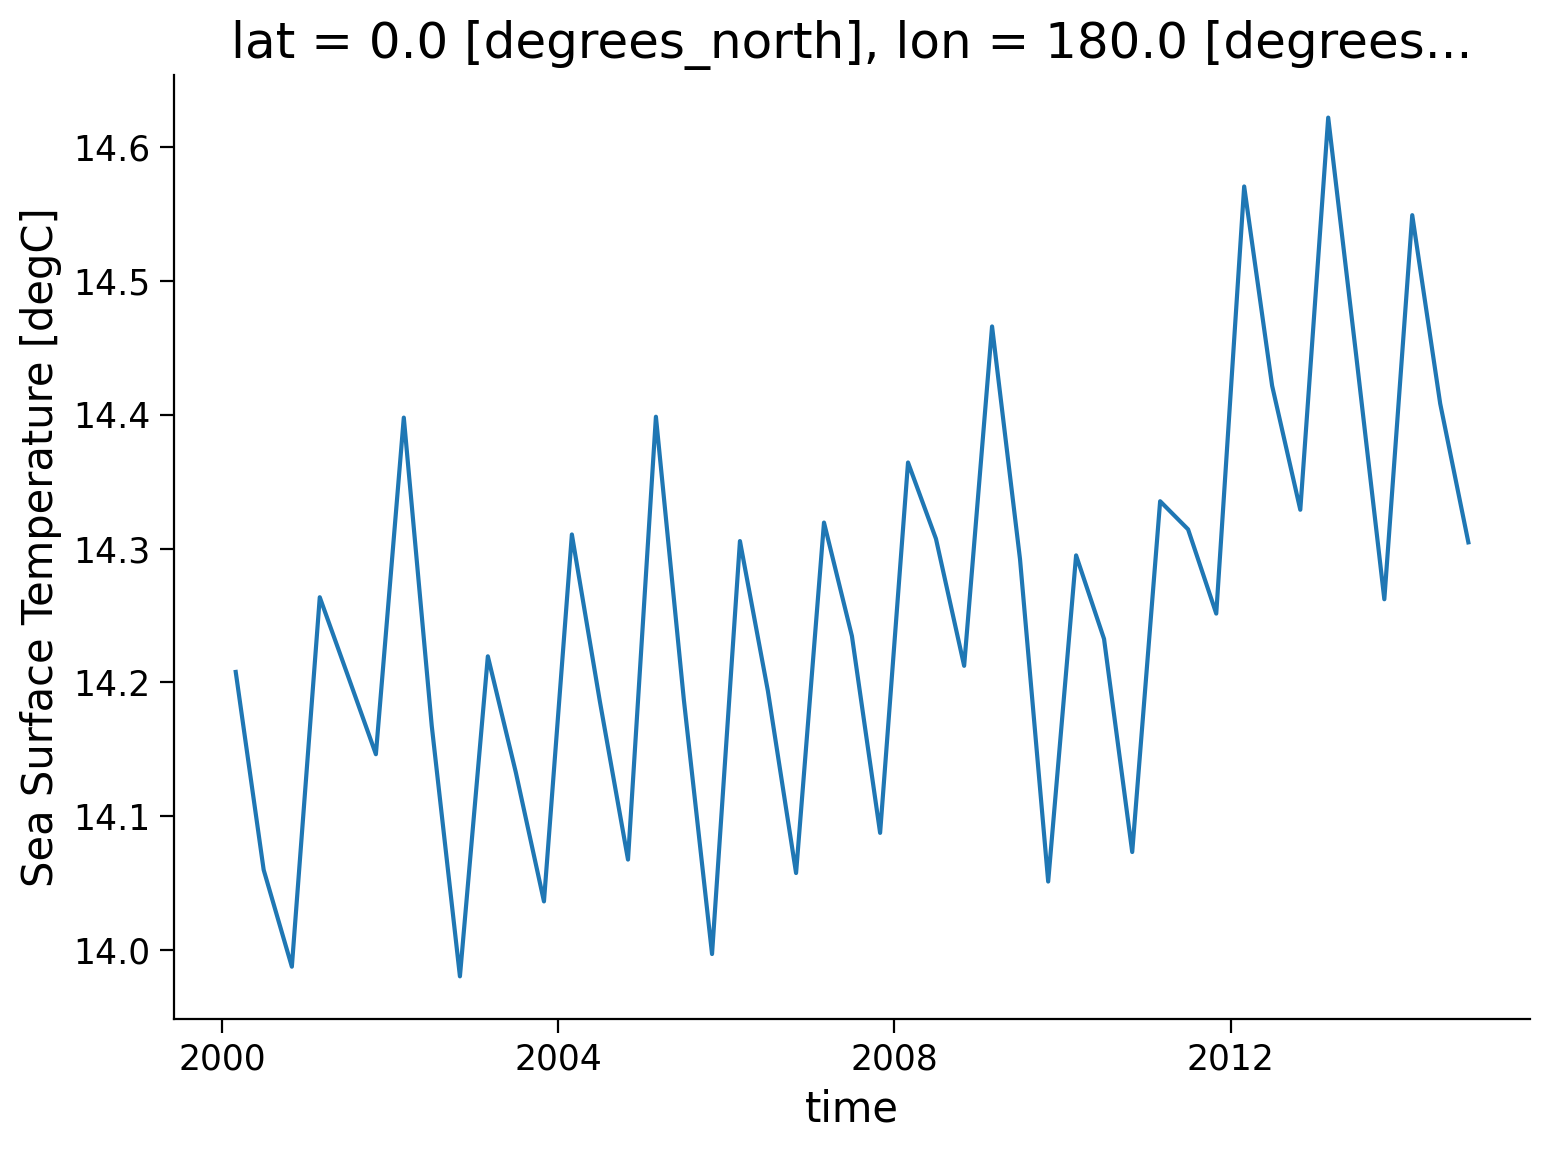

In [15]:
coarse_data.tos.plot()

## Section 1.4: Compare the Resampling Methods

Now that we've tried multiple resampling methods on different temporal resolutions, we can compare the resampled datasets to the original.

In [16]:
original_global = ds.mean(dim=["lat", "lon"])

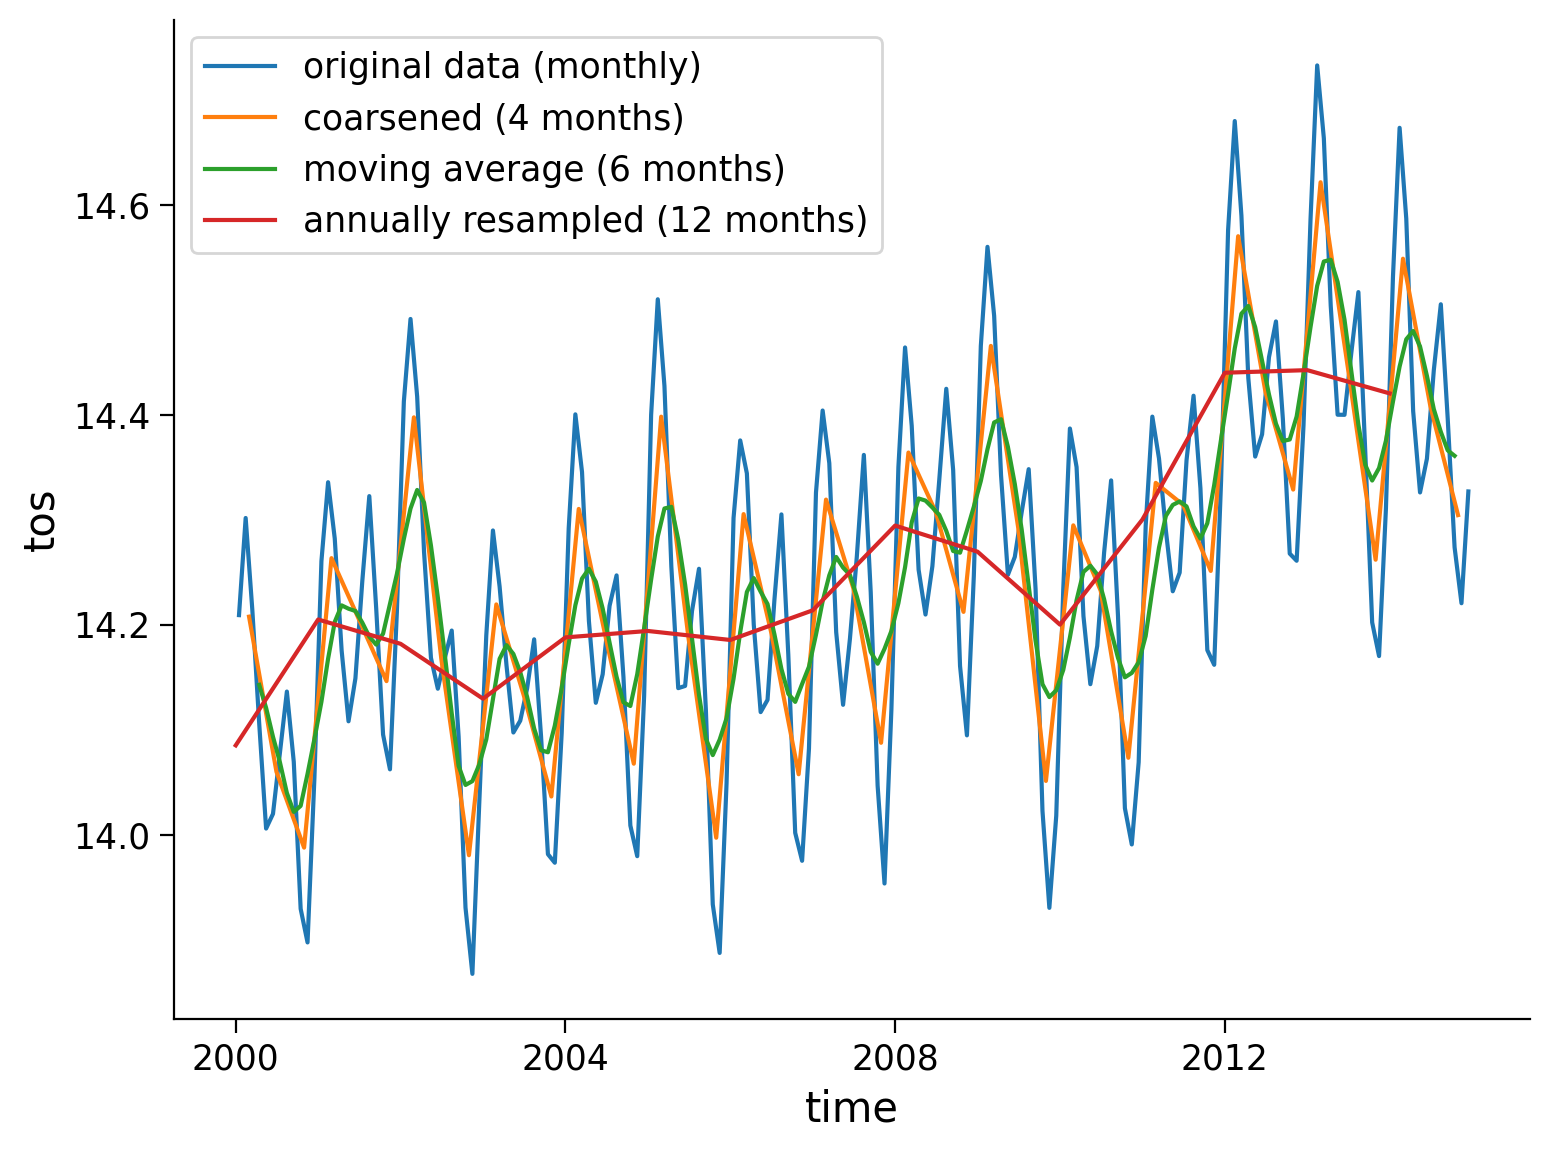

In [17]:
original_global.tos.plot(size=6)
coarse_data.tos.plot()
tos_m_avg_global.plot()
annual_mean_global.plot()


plt.legend(
    [
        "original data (monthly)",
        "coarsened (4 months)",
        "moving average (6 months)",
        "annually resampled (12 months)",
    ]
)

### Questions 1.4: Climate Connection

1. What type of information can you obtain from each time series?
2. In what scenarios would you use different temporal resolutions?


[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial7_Solution_9e05e276.py)



In [18]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1_4")

# Summary
In this tutorial, we've explored Xarray tools to simplify and understand climate data better. Given the complexity and variability of climate data, tools like `.resample()`, `.rolling()`, and `.coarsen()` come in handy to make the data easier to compare and find long-term trends. You've also looked at valuable techniques like calculating moving averages.

# Resources

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).